Player matches count

number of players: 750


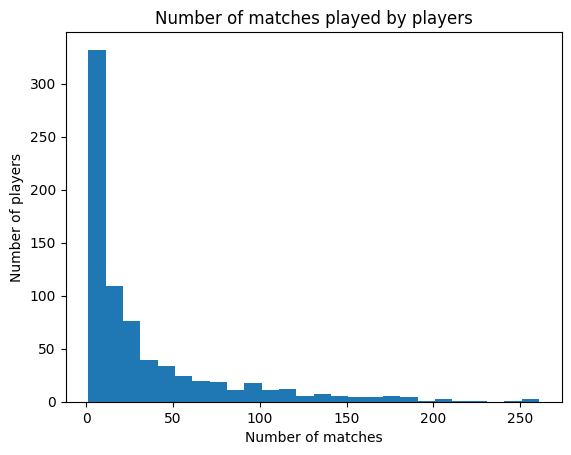

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

interim_df = pd.read_csv('../data/interim/T20_all.csv')
a = interim_df.groupby("player_id").size()

print(f"number of players: {len(a)}")
players_less_than_10_venues = a[a < 10].index

plt.hist(a, bins=range(1,  a.max()+1, 10))
plt.title("Number of matches played by players")
plt.xlabel("Number of matches")
plt.ylabel("Number of players")
plt.show()

difference

In [15]:
from sklearn.metrics import mean_absolute_error
k = 7
processed_df = pd.read_csv(f'../data/processed/combined/{k}_himanshu.csv')

mean_absolute_error(processed_df[f"last_{k}_matches_fantasy_points_sum"], processed_df["fantasy_points"])

32.84008406067088

# player per match

match_id
335982     22
335983     22
335984     22
335985     22
335986     22
           ..
1304116    22
1312197    22
1312198    22
1312199    22
1312200    22
Length: 950, dtype: int64


<Axes: >

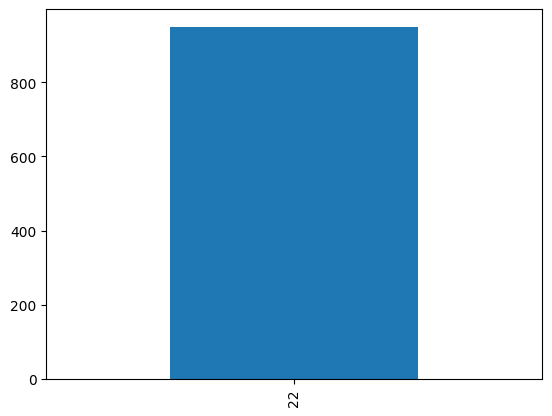

In [28]:
interim_df = pd.read_csv('../data/interim/T20_all.csv')

# count number of player in each match
df = interim_df[interim_df["date"] < "2023-01-01"].groupby("match_id").size()

print(df)

df.groupby(df).size().sort_index().plot(kind='bar')

In [16]:
import pandas as pd
import glob
import json

json_files = glob.glob("../data/raw/cricsheet/all_json/*.json")

# Read the JSON files into a list of dictionaries
data = []
not_found = 0
for file in json_files:
    with open(file, "r") as f:
        d = json.load(f)
        if "info" in d and "event" in d["info"]:

            data.append(d["info"]["event"]["name"])
        
        else:
            not_found += 1
        # data.append(d["info"]["event"]["name"])


print(len(set(data)))
print(not_found)

1
0


In [17]:
import glob
import json

json_files = glob.glob("../data/raw/cricsheet/all_json/*.json")
less_inning = 0
less_overs = 0
less_inning_files = []
less_inning_overs= []
for file in json_files:
    with open(file, "r") as f:
        d = json.load(f)
        if len(d["innings"]) < 2:
            less_inning_files.append(file.split("/")[-1].split(".")[0])
            less_inning += 1
            less_inning_overs.append(len(d["innings"][0]["overs"]))
            continue
        if len(d["innings"][0]["overs"]) < 50:
            less_overs += 1



print(less_inning)
print(less_overs)
less_inning_files = [int(x) for x in less_inning_files]
print(less_inning_files)
print(less_inning_overs)

3
1112
[1359519, 829763, 501265]
[20, 20, 11]


In [13]:
import pandas as pd

squads = pd.read_csv("../data/processed/squads.csv")
people = pd.read_csv("final_classified.csv")

if squads["player_id"].isin(people["player_id"]).all():
    print("df['player_id'] is a subset of df2['player_id']")
else:
    print("df['player_id'] is NOT a subset of df2['player_id']")

KeyError: 'player_id'

In [6]:
import pandas as pd

squad1 = pd.read_csv("../data/processed/squad1.csv")
people = pd.read_csv("../data/raw/cricsheet/people.csv")

squad1["key_cricinfo"] = people["key_cricinfo"].iloc[: len(squad1)]
squad1.to_csv("../data/processed/squad1_new.csv", index=False)

In [45]:
people = pd.read_csv("../data/raw/cricsheet/people.csv")
print(people.columns)
# people[people["key_cricinfo"].isna()].iloc[:, 3:]
# people[people["key_cricinfo"]].max()

# people[["key_cricinfo_3"]].notna().all(axis=1).sum()
people[~people["key_cricinfo_3"].isna()].iloc[:, 3:]

Index(['identifier', 'name', 'unique_name', 'key_bcci', 'key_bcci_2',
       'key_bigbash', 'key_cricbuzz', 'key_cricheroes', 'key_crichq',
       'key_cricinfo', 'key_cricinfo_2', 'key_cricinfo_3', 'key_cricingif',
       'key_cricketarchive', 'key_cricketarchive_2', 'key_cricketworld',
       'key_nvplay', 'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse',
       'key_pulse_2'],
      dtype='object')


,key_bcci,key_bcci_2,key_bigbash,key_cricbuzz,key_cricheroes,key_crichq,key_cricinfo,key_cricinfo_2,key_cricinfo_3,key_cricingif,key_cricketarchive,key_cricketarchive_2,key_cricketworld,key_nvplay,key_nvplay_2,key_opta,key_opta_2,key_pulse,key_pulse_2
5997,NaN,NaN,NaN,NaN,NaN,NaN,1058210.0,40630.0,1463980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Afghanistan matches filter

In [7]:
import pandas as pd
import zipfile
import os
from data_update import create_readme_df
import shutil

output_dir = "../data/raw/cricsheet/"
json_dir = os.path.join(output_dir, "AFG_matches_all")
readme_path = os.path.join(json_dir, "README.txt")

with zipfile.ZipFile(os.path.join(output_dir, "AFG_matches_json.zip"), 'r') as zip_ref:
    zip_ref.extractall(json_dir)

readme_df = create_readme_df(readme_path)

readme_df_afg = readme_df[readme_df["teams"].str.contains("Afghanistan")]

readme_df_afg["date"] = readme_df_afg["date"].dt.strftime("%Y-%m-%d")
with open(readme_path, "w") as file:
    for _, row in readme_df_afg.iterrows():
        line = " - ".join(row.astype(str))
        file.write(line + "\n")

print(f"Number of Afghanistan matches: {len(readme_df_afg)}")

for match_id in set(readme_df["match_id"]) - set(readme_df_afg["match_id"]):
    os.remove(os.path.join(json_dir, f"{match_id}.json"))

with zipfile.ZipFile(os.path.join(output_dir, "AFG_matchesson.zip"), 'w') as zipf:
    print(f"Zipping these many files: ", len(os.listdir(json_dir)))
    for file_name in os.listdir(json_dir):
        zipf.write(os.path.join(json_dir, file_name), arcname=file_name)

Number of Afghanistan matches: 112
Zipping these many files:  113


In [1]:
import pandas as pd

df1 = pd.read_csv("../data/processed/combined/7_final_1.csv")
df2 = pd.read_csv("../data/processed/combined/7_final.csv")

print(df1.equals(df2))

True
